# Simple Linear Regression

In [1]:
##packages required
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('http://bit.ly/w-data')

# Analyze the data

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.shape

(25, 2)

In [6]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

Indicates our independent variable Hours and dependent variable Scores is continous.

In [7]:
list(df.columns)

['Hours', 'Scores']

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# visualize the data

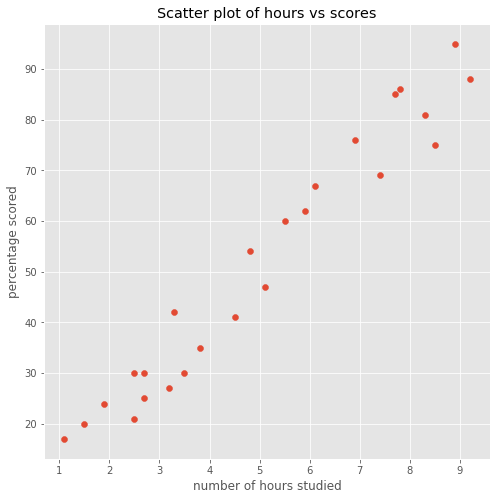

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
a=df['Hours']    
b=df['Scores']   
plt.style.use('ggplot')
plt.figure(figsize=(8,8))
plt.scatter(a,b)
plt.title('Scatter plot of hours vs scores')
plt.xlabel('number of hours studied')
plt.ylabel('percentage scored')
plt.savefig("scatter")


The above graph shows that there is positive linear relationship between number of hour studied and the percentage scored by the student.

In [10]:
from scipy.stats import pearsonr
corr,_ = pearsonr(df['Hours'], df['Scores'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.976


The 0.976 value indicates that there is a strong positive correlation between number of hours studied and the percentage scored by the student.

# Splitting the Data

In [11]:
import statsmodels.api as sm

X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

X = sm.add_constant(X)

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=92) 

# Building the SLR model for train set

In [12]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     330.1
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           5.02e-13
Time:                        17:00:05   Log-Likelihood:                -62.978
No. Observations:                  20   AIC:                             130.0
Df Residuals:                      18   BIC:                             131.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6307      3.194      0.824      0.4

From the above summary

As the p-value for the variable Hours is 0.00, we conclude variable Hours is statistically significant i.e. there is influence of number of hours studied on percentage scored by the student.
As the Durbin-Watson value is 2.285, we conclude that the there is no autocorrelation in variable Hours.

In [13]:
print('Intercept of the model is:', model.params[0]) 
print('Slope of the model is:',model.params[1])

Intercept of the model is: 2.6306557703807094
Slope of the model is: 9.845026908511063


The coefficient 9.8450 means that as the hours variable increases by 1, the predicted value of scores increases by 9.8450.

The fitted model is: model= 2.6306 + 9.8450*(Hours)

In [14]:
print('The R-Square is:',model.rsquared)
print('The Adjusted R-Square is:',model.rsquared_adj)

The R-Square is: 0.9482962100535626
The Adjusted R-Square is: 0.9454237772787605


Adjusted R-Square explains 94.5% of the variance in our dependent variable by the model.

# Fitted regression line on train set

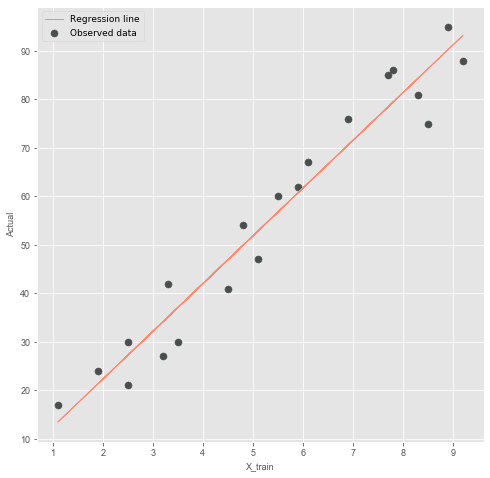

In [15]:
##dataframe for test set to build regression line
from bioinfokit.visuz import stat
pred= model.predict(X_train)
df3 = pd.DataFrame({'X_train':X_train[:,1], 'Actual': y_train.flatten(), 'Predicted': pred.flatten()})
stat.regplot(df=df3, x='X_train', y='Actual', yhat='Predicted',dim=(8,8),show=True,dotsize=50)

# Residual plot

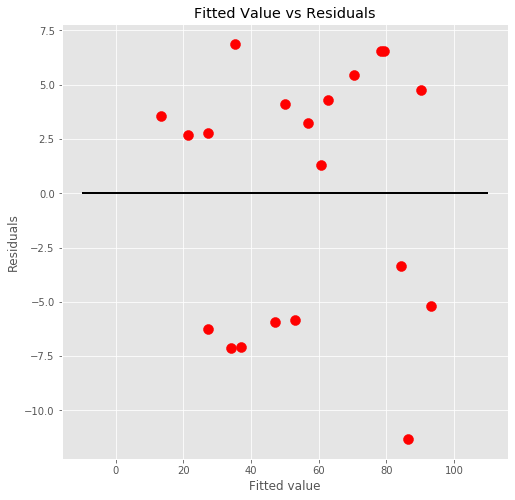

In [16]:
## plotting residual errors of train dataset 
plt.figure(figsize=(8,8))
plt.scatter(x=pred,y= y_train-pred, 
            color = "red", s = 100, label = 'Train data') 
plt.title('Fitted Value vs Residuals')
plt.hlines(y = 0, xmin = -10, xmax = 110, linewidth = 2)
plt.xlabel('Fitted value')
plt.ylabel('Residuals')
plt.show()

 There is no as such pattern in residuals points are scattered.

# Predicting the model on test set

In [17]:
y_pred = model.predict(X_test)
y_pred

array([29.21222842, 29.21222842, 17.39819613, 40.04175802, 75.48385489])

In [18]:
y_test

array([30, 25, 20, 35, 69], dtype=int64)

In [19]:
df1 = pd.DataFrame({'X_test':X_test[:,1],'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1

,X_test,Actual,Predicted
0,2.7,30,29.212228
1,2.7,25,29.212228
2,1.5,20,17.398196
3,3.8,35,40.041758
4,7.4,69,75.483855


# Plot of Actual vs Predicted on test set

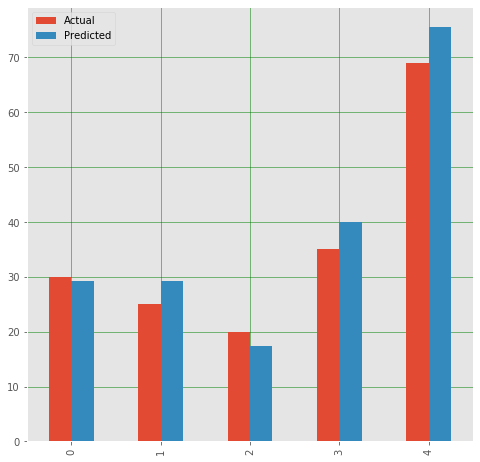

In [20]:
df2=df1.iloc[:,1:3].head()
df2.plot(kind='bar',figsize=(8,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Plot on test set

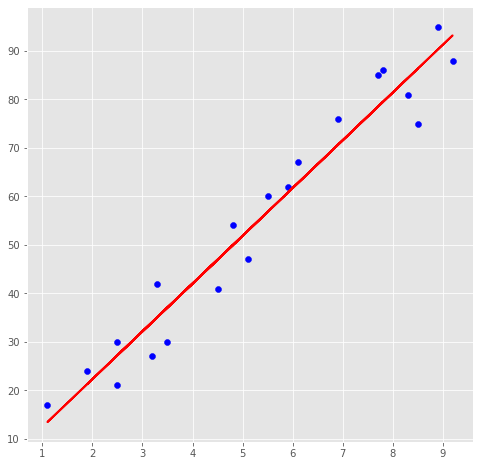

In [21]:
plt.figure(figsize=(8,8))      
plt.scatter(X_train[:,1], y_train,  color='blue')
plt.plot(X_train[:,1], pred, color='red', linewidth=2)
plt.show()

# Performance of Algorithm

In [22]:
from statsmodels.tools.eval_measures import mse
print('The Mean Square Error is',mse(y_test,y_pred))

The Mean Square Error is 18.518506789393676


In [23]:
from statsmodels.tools.eval_measures import rmse
print('The Root Mean Square Error is',rmse(y_test,y_pred))

The Root Mean Square Error is 4.303313466317981


RMSE represents how concentrated the data ia around the best fit line. Lower the value of RMSE, better is the model.

In [24]:
from statsmodels.tools.eval_measures import meanabs
print('The Mean Absolute Error is',meanabs(y_test,y_pred))

The Mean Absolute Error is 3.825483356587604


Smaller the MAE, the better model will predict.

In [25]:
from sklearn.metrics import r2_score
print("R-Square for test set: %.2f" % r2_score(y_test,y_pred))
print('R-Square for train set:',model.rsquared)

R-Square for test set: 0.94
R-Square for train set: 0.9482962100535626


# Predicting the given data point

In [26]:
x = np.array((1,9.25)).reshape(1,2)
x

array([[1.  , 9.25]])

In [27]:
print('Student studies for 9.25 hrs in a day, percentage scored will be = {}'.format(model.predict(x)[0]))

Student studies for 9.25 hrs in a day, percentage scored will be = 93.69715467410805


Predicted percentage of marks that a student is expected to score for 9.25 hours a day they studied is 93.69